# Interactive Notebooks Tutorial


<hr style="margin-bottom: 40px;">

## What is Jupyter Notebook?

Jupyter (formerly IPython Notebook) is an open-source project that lets you easily combine narrative text (Markdown) and executable Python source code on one canvas called a **notebook**.

The notebook combines live code, equations (LaTeX), narrative text, visualizations, interactive dashboards and other media.

### Objective of this tutorial:

> **Help you get started with Jupyter Notebook for Data Analysis and Data Visualization**

### Part 1: everything is a _cell_

Jupyter Notebooks are organized as a set of _"cells"_. 

Each cell can contain different types of content: like Python code (or R, etc), images or even human readable text (markdown), like the one you're currently reading.

Markdown is a text formatting tool.


In [5]:
1+1
2+2

4

On any cell, press X then V to cut & paste

On any cell, C then V to copy & paste

This is another cell containing Markdown (human readable) code. And below, another empty cell:

You can edit these cells just by double clicking on them. Try editing the following cell:

**👉 Double click on me 👈**

When you double click the cell, it should open an "edit mode"

If you're seeing those asterisks, it's because you've correctly entered "Edit Mode". Once you've made the changes, you have to "execute", or "run" the cell to reflect the changes.

Jupyter notebooks are optimized for an efficient workflow. There are many keyboard shortcuts that will let you interact with your documents, run code and make other changes; mastering these shortcuts will speed up your work. For example, there are two shortcuts to execute a cell:

1. `shift + return`: Run cell and advance to the next one.
2. `ctrl  + return`: Run the cell but don't change focus.


Try them with the following cell:

In [1]:
2 + 2

4

You can try executing these cells as many times as you want, it won't break anything

#### `ctrl + Return` effect:

The code is correctly executed (it returns 4) and the focus (the blue line at the left side of the cell) stays in the same cell.

Now compare it to the next shortcut, `shift + return`:

#### `shift + Return` effect:

The focus changes to the cell below.

## Part 2: Working with code

Jupyter notebooks have amazing features to include text and images and create beautiful, human readable documents as you've just seen. But their main benefit is working with code. Now we're going to import a few libraries and start experimenting with Python code. We've already done the simple `2 + 2` before, so let's do something a little bit more interesting. First, we need to import `numpy` and `matplotlib`:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We've just imported these two libraries:
* `numpy` the most popular Python library for array manipulation and numeric computing
* `matplotlib` the most popular visualization library in the Python ecosystem.

Let's now execute a few lines of code and generate some plots:

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

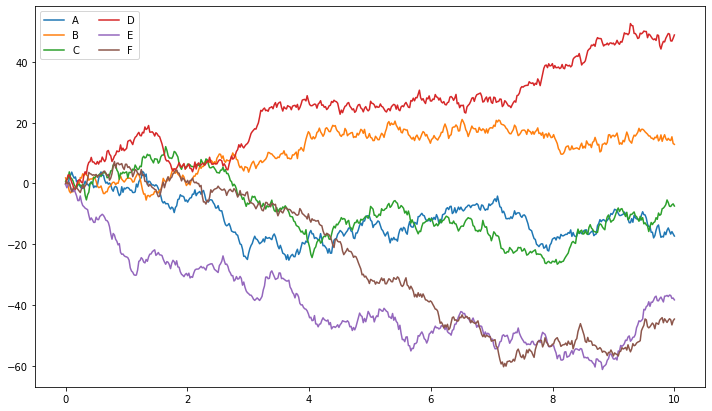

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

But what is that? Just random generated datapoints, but you can clearly see how simple is to do numeric processing and plotting with Jupyter Notebook.

## Part 3: Interacting with data

We're going to pull cryptocurrencies prices from a public API and download them as Excel files. 

We need to import two libraries first: `requests` (to pull data from the web) and `pandas` to process it.

In [6]:
import requests
import pandas as pd

This is a predefined function that simplifies the process of importing data from [Cryptowatch](https://cryptowat.ch) (for reference, check [their docs](https://cryptowat.ch/docs/api#ohlc)).

ohlc = open, high, low, & close prices

period: 3600 = 1-hour ([docs](https://docs.cryptowat.ch/rest-api/markets/ohlc))

In [4]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

We will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [7]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-10-05 10:17:54.107195')

In [8]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [9]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

**Bitcoin:**

In [14]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02
mean,19578.950617,19626.771605,19522.061728,19572.882716,48.091553,9.436173e+05
std,387.557678,397.326036,379.415989,386.619051,61.484882,1.212776e+06
min,18970.000000,19032.000000,18853.000000,18967.000000,3.813175,7.403552e+04
25%,19328.000000,19377.750000,19262.500000,19317.250000,15.019970,2.926961e+05
50%,19492.000000,19522.500000,19461.500000,19490.000000,30.839203,6.024515e+05
75%,19982.500000,20016.500000,19912.750000,19975.000000,56.206903,1.124495e+06
max,20388.000000,20447.000000,20327.000000,20370.000000,527.648229,1.048932e+07


In [12]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2022-10-05 11:00:00 to 2022-10-12 04:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   162 non-null    int64  
 1   HighPrice   162 non-null    int64  
 2   LowPrice    162 non-null    int64  
 3   ClosePrice  162 non-null    int64  
 4   Volume      162 non-null    float64
 5   NA          162 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 8.9 KB


In [10]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-10-05 11:00:00,20090,20156,20083,20127,30.572176,6.148384e+05
2022-10-05 12:00:00,20129,20135,19967,20030,77.064067,1.543890e+06
2022-10-05 13:00:00,20031,20072,19973,20028,49.483176,9.907886e+05
2022-10-05 14:00:00,20023,20040,19822,19921,527.648229,1.048932e+07
2022-10-05 15:00:00,19917,19932,19735,19883,121.880779,2.417324e+06


<AxesSubplot:xlabel='CloseTime'>

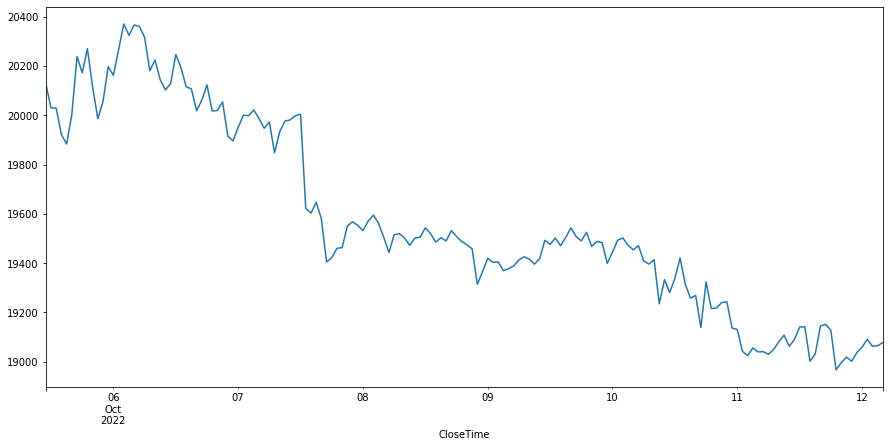

In [11]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [ ]:
eth.head()

In [ ]:
eth['ClosePrice'].plot(figsize=(15, 7))

As you can see, we're able to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Notebook.

In [ ]:
eth.head()

## Part 4: Exporting to Excel

We're now ready to generate an Excel file from the downloaded prices. Working with Excel and other formats (like CSV or JSON) is extremely simple in Jupyter Lab (thanks to pandas and Python). Our first step will be to create an "Excel writer", a component from the `pandas` package:

In [ ]:
writer = pd.ExcelWriter('cryptos.xlsx')

We'll now write both our Bitcoin and Ether data as separate sheets:

In [ ]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [ ]:
eth.to_excel(writer, sheet_name='Ether')

And finally, we can save the file:

In [ ]:
writer.save()